<a href="https://colab.research.google.com/github/Vinh1207/Phan-Cao-Vinh/blob/main/Nhandienkhuonmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [2]:
train_set=train_data.flow_from_directory('/content/drive/MyDrive/Nhandienkhuonmat/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 162 images belonging to 3 classes.


In [3]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import layers
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 128)      0

In [4]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(train_set, epochs=10, batch_size=128,verbose=1)

Epoch 1/10
6/6 [==============================] - 52s 9s/step - loss: 1.0977 - accuracy: 0.4691
Epoch 2/10
6/6 [==============================] - 13s 2s/step - loss: 1.0534 - accuracy: 0.7099
Epoch 3/10
6/6 [==============================] - 13s 2s/step - loss: 0.0373 - accuracy: 1.0000
Epoch 4/10
6/6 [==============================] - 13s 2s/step - loss: 0.0042 - accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 14s 2s/step - loss: 0.0013 - accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 13s 2s/step - loss: 5.5608e-04 - accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 19s 4s/step - loss: 2.2488e-04 - accuracy: 1.0000
Epoch 8/10
6/6 [==============================] - 13s 2s/step - loss: 2.2731e-04 - accuracy: 1.0000
Epoch 9/10
6/6 [==============================] - 14s 2s/step - loss: 9.5415e-05 - accuracy: 1.0000
Epoch 10/10
6/6 [==============================] - 15s 3s/step - loss: 4.4860e-05 - accuracy: 1.0000


In [12]:
model.save("Nhan_dien_khuon_mat.h5")

In [13]:
from keras.models import load_model
model_face=load_model('Nhan_dien_khuon_mat.h5')

1/1 [==============================] - 0s 37ms/step
Đây là bạn : Hau


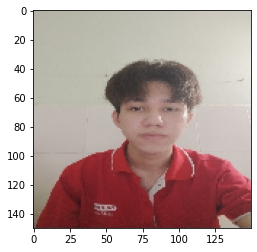

In [17]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/drive/MyDrive/Nhandienkhuonmat/Test/Hau/TQH (58).jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_face.predict(img)
class_name=['Hau','Lam','Mi']
m= int(np.argmax(result,axis=1))
print("Đây là bạn :", class_name[m])